## Download dữ liệu phân bón từ google drive về

In [ ]:
#Download dữ liệu phân bón fresh + Dry Matter (bao gồm gia súc và gia cầm)
!gdown --id 1Eqy2Wvewq5sO3nBCM3PjiKfSD3ZHW_Gf

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Eqy2Wvewq5sO3nBCM3PjiKfSD3ZHW_Gf
To: /content/Fresh_Manure_with_Dry_Matter.xlsx
100% 2.18M/2.18M [00:00<00:00, 167MB/s]


## Trực quan dữ liệu phổ NIR

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [ ]:
fresh_spectra_df = pd.read_excel("Fresh_Manure_with_Dry_Matter.xlsx")

In [ ]:
fresh_spectra = fresh_spectra_df.values[:,1:-1]
dry_matter = fresh_spectra_df.values[:,-1:]

In [ ]:
def visualize_spectra(matrix,title):
    num_lines = matrix.shape[0]  # Số đường trên đồ thị
    plt.figure(figsize=(6, 3))
    # Vẽ đồ thị
    for i in range(num_lines):
        plt.plot(matrix[i, :])

    plt.xlabel('Wavelength')  # Nhãn trục X
    plt.ylabel('Reflectance')  # Nhãn trục Y
    plt.title(title)  # Tiêu đề đồ thị

    plt.show()  # Hiển thị đồ thị

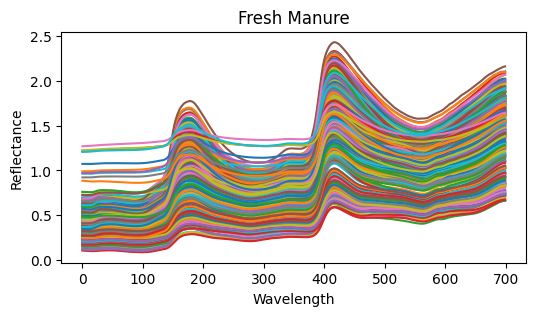

In [ ]:
visualize_spectra(fresh_spectra,'Fresh Manure')

In [ ]:
fresh_spectra.shape

(332, 700)

## Xác định khoảng phổ

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(fresh_spectra, dry_matter, test_size=0.4, random_state=3)

In [ ]:
model = xgboost.XGBRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 31.359908411749952


In [ ]:
# windown_value = []
# for i in range (0,700,50):
#   X_train, X_test, y_train, y_test = train_test_split(fresh_spectra[:,i:i+50], dry_matter, test_size=0.4, random_state=1)
#   reg = LinearRegression().fit(X_train, y_train)
#   y_pred = reg.predict(X_test)
#   mse = mean_squared_error(y_test, y_pred)
#   windown_value.append(mse)
# windown_value

In [ ]:
def find_two_smallest_indices(arr):
    if len(arr) < 2:
        return None  # Không đủ phần tử để tìm hai giá trị nhỏ nhất

    smallest_index = arr.index(min(arr))
    smallest_value = arr[smallest_index]
    arr.pop(smallest_index)  # Xóa giá trị nhỏ nhất đầu tiên

    second_smallest_index = arr.index(min(arr))
    second_smallest_value = arr[second_smallest_index]

    return smallest_index, second_smallest_index

In [ ]:
def find_local_minima(arr):
    local_minima = []
    index_local_minima = []
    for i in range(1, len(arr) - 2):
      if arr[i-1] > arr[i] and arr[i] < arr[i + 1]:
        # print(arr[i])
        index_local_minima.append(i)
        local_minima.append(arr[i])

    return local_minima , index_local_minima

# # Example usage:
# minima,_ = find_local_minima(windown_value)
# print("Local Minima:", minima)

In [ ]:
def find_spectral_bands(random_state):
  windown_value = []
  for i in range (0,650,20):
    X_train, X_test, y_train, y_test = train_test_split(fresh_spectra[:,i:i+50], dry_matter, test_size=0.4, random_state=random_state)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    windown_value.append(mse)
  local_minima, index_local_minima = find_local_minima(windown_value)
  # print(windown_value)
  # print(len(local_minima))
  # print(len(index_local_minima))
  plt.plot(windown_value)
  smallest_index, second_smallest_index = find_two_smallest_indices(local_minima)
  a = index_local_minima[smallest_index]*20
  b = index_local_minima[second_smallest_index]*20
  return f"{a} -> {a+50}, {b} -> {b+50}"

  # return f"{np.argmin(windown_value)*20} -> {np.argmin(windown_value)*20+50}",windown_value

120 -> 170, 380 -> 430
440 -> 490, 120 -> 170
440 -> 490, 300 -> 350
440 -> 490, 120 -> 170
440 -> 490, 120 -> 170
120 -> 170, 360 -> 410
120 -> 170, 220 -> 270
260 -> 310, 300 -> 350
440 -> 490, 120 -> 170
120 -> 170, 160 -> 210
440 -> 490, 280 -> 330
260 -> 310, 360 -> 410
120 -> 170, 380 -> 430
440 -> 490, 120 -> 170
440 -> 490, 120 -> 170
120 -> 170, 360 -> 410
120 -> 170, 160 -> 210
440 -> 490, 300 -> 350
440 -> 490, 120 -> 170
280 -> 330, 140 -> 190
440 -> 490, 300 -> 350
120 -> 170, 360 -> 410
440 -> 490, 280 -> 330
440 -> 490, 120 -> 170
440 -> 490, 120 -> 170
440 -> 490, 120 -> 170
300 -> 350, 300 -> 350
440 -> 490, 300 -> 350
440 -> 490, 280 -> 330
440 -> 490, 260 -> 310
440 -> 490, 120 -> 170
120 -> 170, 360 -> 410
120 -> 170, 360 -> 410
120 -> 170, 160 -> 210
120 -> 170, 360 -> 410
120 -> 170, 360 -> 410
440 -> 490, 300 -> 350
440 -> 490, 120 -> 170
440 -> 490, 280 -> 330
300 -> 350, 360 -> 410
260 -> 310, 380 -> 430
440 -> 490, 140 -> 190
120 -> 170, 160 -> 210
440 -> 490,

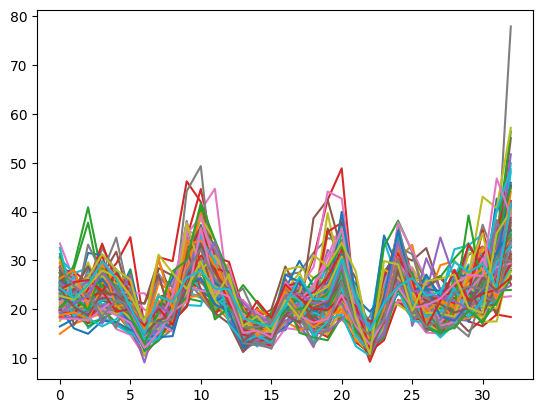

In [ ]:
for random_state in range(0,100):
  print(find_spectral_bands(random_state))